**Deep Learning : Assignment 3 - CNN, RNN, LSTM and GRU**


**Problem - 1** Image Classification using **CNN**: \\
\
The **CIFAR-10** dataset consists of $60000$ $(32$ x $ 32)$ colour images in $10$ classes, with $6000$ images per
class. There are $50000$ training images and $10000$ test images. The task is to construct a CNN for
CIFAR10 classification.

In [0]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os

(a) Fetch the training and test datasets for CIFAR10 using the built in functions in Tensorflow or
Keras. 

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# See later if normalization helps
train_images, test_images = train_images / 255.0, test_images / 255.0

(b) Create a validation set of $10000$ images from the training set.

In [0]:
validation_images = train_images [ : 10000]
validation_labels = train_labels [ : 10000]
train_images = train_images [10000 : ]
train_labels = train_labels [10000 : ]

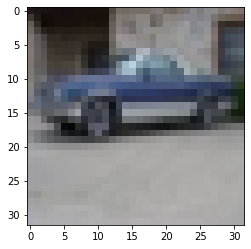

[1]


In [174]:
# print(np.shape(validation_images)) # (10000, 32, 32, 3) 
# print(np.shape(train_images))
# 10000 images of (32 x 32) pixel grid x 3 channels RGB
plt.figure(figsize=(4,4))
plt.imshow(train_images[0])
plt.show()
print(train_labels[0])
%matplotlib inline
# print(train_images)

(c) Train the following CNN architectures as follows:

##Model1##
 • The network comprises of 2 convolutional layers and 2 max pooling layers and 1 fully connected hidden layer.  
 • Number of kernels in the first convlayer = 32 (5x5 filters)  
 • Number of kernels in the 2nd conv layer = 64 (5x5 filters)  
 • Max pooling of size 2x2  
 • Non-Linearity used in all hidden layers is ReLU  
 • The output layer is softmax  
 • Number of units in the fully connected hidden layer1 = 64  
 • Number of units in the output layer = 10 

The network architecture would be as given below: 

Input -> conv1 (32 filters (5x5)) -> Maxpool (2x2) -> conv2 (64 filters (5x5)) -> Maxpool (2x2) -> Flatten ->  FCL1(64) -> Softmax output layer(10)

In [175]:

# https://www.tensorflow.org/api_docs/python/tf/keras/models
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/add

# ***Some pointers*** : 
# a) Give input_shape as 32 * 32 * 3 (3 channels of 32 x 32 pixels) to first layer
# we don't need to give input_shape for further layers

# b) Kernel depth is same as image depth. And hence kernel_size argument 
# just takes list of 2 integers, i.e. it infers depth from input (or its previous)
# Example in first layer, there are 32 kernels
# of (5 x 5 x 3) dimension hence Total parameters = 32 * (5 * 5 * 3 + 1) = 2432 
# ( + 1 for Bias for each kernel)

# c) This blog explains why shouldn't we initialize the kernel with zero value
# or random https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528
# The default kernel initializer in Conv2D is 'glorot_uniform' but with 'relu'
# as activation function it seems 'he_uniform' works better

model_1 = models.Sequential() # Linear stack of layers

# conv1 (32 filter (5 x 5))
model_1.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
# MaxPool (2 x 2)
model_1.add(layers.MaxPooling2D((2, 2))) 
# conv2 (64 filters (5 x 5)
model_1.add(layers.Conv2D(64, (5, 5), activation='relu'))
# MaxPool (2 x 2)
model_1.add(layers.MaxPooling2D(2, 2))
# Flatten before going into densely fully connected layer (FC) 
model_1.add(layers.Flatten())
# FCL1 (64 nodes in the dense layer)
model_1.add(layers.Dense(64, activation='relu'))
# output softmax layer of 10 nodes (since we have 10 classes)
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_22 (Dense)             (None, 10)              

In [176]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile
# Configures the model for training
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_1 = os.path.dirname("training_1/training_1.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_1, save_weights_only=True)

model_1.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 1.5396 - acc: 0.4483 - val_loss: 1.2753 - val_acc: 0.5521
Epoch 2/10
40000/40000 [==============================] - 84s 2ms/sample - loss: 1.1710 - acc: 0.5867 - val_loss: 1.1083 - val_acc: 0.6174
Epoch 3/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 1.0106 - acc: 0.6490 - val_loss: 1.0069 - val_acc: 0.6527
Epoch 4/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 0.9095 - acc: 0.6841 - val_loss: 0.9726 - val_acc: 0.6652
Epoch 5/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 0.8389 - acc: 0.7071 - val_loss: 0.9599 - val_acc: 0.6705
Epoch 6/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 0.7756 - acc: 0.7321 - val_loss: 0.9554 - val_acc: 0.6745
Epoch 7/10
40000/40000 [==============================] - 83s 2ms/sample - loss: 0.7241 - acc: 0.7459 - val_loss: 0.

In [178]:
score_1 = model_1.evaluate(test_images, test_labels, verbose=1)

10000/10000 [==============================] - 6s 557us/sample - loss: 1.0059 - acc: 0.6850
